In [2]:
%matplotlib inline 
from sets import Set
import numpy as np
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib.pyplot as plt

/Users/nicochaves/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/nicochaves/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: the sets module is deprecated
  from ipykernel import kernelapp as app


## Read in the Data

In [15]:
file_dir = 'data/processed2/'
filename = 'NA12878.LowSeq.illumina.bwa.sorted.dedup.20.sam.wFlag.qual.recalibrated.filtered.noNAN.scaled.withGndTruthLabels.table'

df = pd.read_csv(file_dir + filename, sep='\t')
gnd_truth = df['GROUND_TRUTH']
df = df.drop(['Unnamed: 0', 'GROUND_TRUTH', 'FILTER'], axis=1)
df.describe()

,QUAL,AC,AF,DP,FS,MLEAC,MLEAF,MQ,QD,SOR,sample1.DP,sample1.GQ
count,8.684300e+04,8.684300e+04,8.684300e+04,8.684300e+04,8.684300e+04,8.684300e+04,8.684300e+04,8.684300e+04,8.684300e+04,8.684300e+04,8.684300e+04,8.684300e+04
mean,4.906040e-14,-3.235018e-13,-3.235018e-13,-3.352225e-15,1.821783e-14,-3.549895e-13,-3.549895e-13,-7.454528e-15,4.105837e-14,7.803484e-15,-6.254204e-15,-5.154774e-14
std,4.277328e-02,4.654448e-01,4.654448e-01,6.014538e-02,5.469738e-02,4.654086e-01,4.654086e-01,1.038794e-01,2.531056e-01,9.798293e-02,6.017468e-02,2.890566e-01
min,-4.416589e-02,-3.173428e-01,-3.173428e-01,-7.154042e-02,-2.950343e-02,-3.172507e-01,-3.172507e-01,-7.533643e-01,-4.517599e-01,-1.481740e-01,-7.249201e-02,-7.676133e-01
25%,-2.479983e-02,-3.173428e-01,-3.173428e-01,-2.669737e-02,-2.950343e-02,-3.172507e-01,-3.172507e-01,4.325963e-02,-2.013324e-01,-6.122305e-02,-2.640906e-02,-2.827648e-01
50%,-1.000288e-02,-3.173428e-01,-3.173428e-01,-1.324446e-02,-2.950343e-02,-3.172507e-01,-3.172507e-01,4.325963e-02,-5.669520e-02,-2.199989e-02,-1.258418e-02,2.323867e-01
75%,1.585441e-02,6.826572e-01,6.826572e-01,4.692763e-03,8.607615e-03,6.827493e-01,6.827493e-01,4.325963e-02,2.704487e-01,4.019863e-02,5.849000e-03,2.323867e-01
max,9.558341e-01,6.826572e-01,6.826572e-01,9.284596e-01,9.704966e-01,6.827493e-01,6.827493e-01,2.466357e-01,5.482401e-01,8.518260e-01,9.275080e-01,2.323867e-01


## Data Visualization Using T-SNE

In [13]:
def plot_embedding(embedding):
    """
    Plot a 2-dimensional embedding of a dataset
    :param embedding: The embedding
    :return: None
    """

    fig, ax = plt.subplots(figsize = (10,10))
    plt.plot(embedding[:,0], embedding[:,1], 'bo')
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.show()

### T-SNE Embedding without Any Labeling

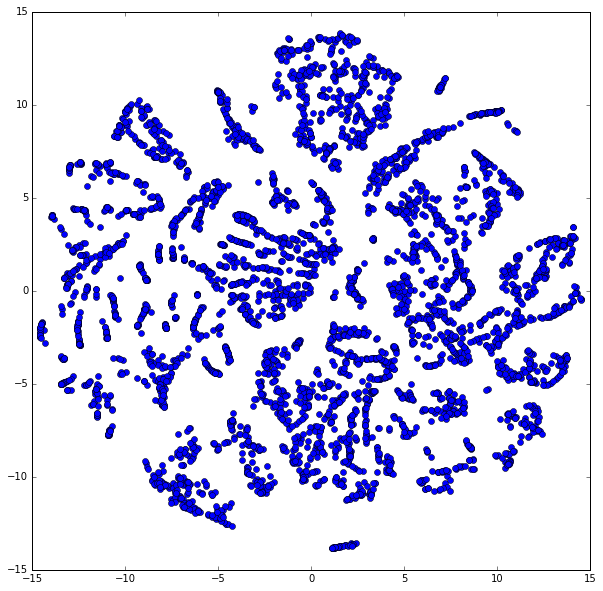

In [22]:
num_data_points_to_embed = 5000 # Take a subset of the data to speed up the execution
model = TSNE(n_components=2, random_state=0)
embedding = model.fit_transform(df[:num_data_points_to_embed])
plot_embedding(embedding)

### Label the T-SNE Embedding using the VQSR Filter's Output Labels

In [23]:
pos_indices = gnd_truth[gnd_truth == 1].index
pos_indices = [i for i in pos_indices if i < num_data_points_to_embed]
neg_indices = gnd_truth[gnd_truth == 0].index;
neg_indices = [i for i in neg_indices if i < num_data_points_to_embed]

pos_embedding = embedding[pos_indices];
neg_embedding = embedding[neg_indices];

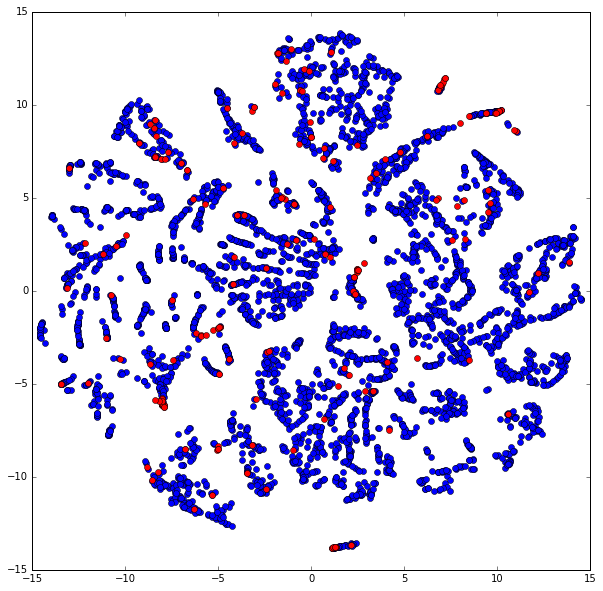

In [24]:
fig, ax = plt.subplots(figsize = (10,10))

plt.plot(pos_embedding[:,0], pos_embedding[:,1], 'bo')
plt.plot(neg_embedding[:,0], neg_embedding[:,1], 'ro')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()